# Project Name: Credit Card Default Prediction

### 1.Problem Statement: 
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

### 2.Import required libraries :

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")
%matplotlib inline

### 3.Data information:

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Reading the data:

In [13]:
df = pd.read_csv("UCI_Credit_Card.csv", index_col = "ID")
df.shape

(30000, 24)

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Information about dataset:

 Dataset has 25 columns and 30000 rows.</br>
 Those 25 columns are:

* ID: ID of each client 

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit 

* SEX: Gender (1=male, 2=female) 

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 

* MARRIAGE: Marital status (1=married, 2=single, 3=others) 

* AGE: Age in years 

* PAY_1: Repayment status in September, 2005 (-2= no credit to pay,-1=pay duly,0= minimum payment is met, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) 

* PAY_2: Repayment status in August, 2005 (scale same as above) 

* PAY_3: Repayment status in July, 2005 (scale same as above) 

* PAY_4: Repayment status in June, 2005 (scale same as above) 

* PAY_5: Repayment status in May, 2005 (scale same as above) 

* PAY_6: Repayment status in April, 2005 (scale same as above) 

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) 

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) 

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) 

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) 

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) 

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) 

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) 

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) 

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) 

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) 

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) 

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 

* default.payment.next.month: Default payment (1=yes, 0=no) 

### More info about categorical columns present in the dataset:



**SEX: Gender**

    1 = Male    
    2 = Female
    
**EDUCATION:**

    1 = graduate school     
    2 = university     
    3 = high school     
    4 = others     
    5 = unknown     
    6 = unknown
    
**MARRIAGE: Marital status**

    1 = married
    2 = single
    3 = others
    
**PAY_1,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)**

    -2= no credit to pay
    -1= pay duly
    0= minimum payment is met
    1 = payment delay for one month
    2 = payment delay for two months
    ... 
    8 = payment delay for eight months
    9 = payment delay for nine months and above
    

### Summary of the dataset

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [165]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [166]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**We can see that dataset has no null values.**

### Proportion of unique values in each column:

In [167]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [168]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

In [169]:
for i in categorical_columns:
    print(df[i].value_counts(normalize=True)*100)
    print(20*"*")

2    60.373333
1    39.626667
Name: SEX, dtype: float64
********************
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
********************
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64
********************
29    5.350000
27    4.923333
28    4.696667
30    4.650000
26    4.186667
31    4.056667
25    3.953333
34    3.873333
32    3.860000
33    3.820000
24    3.756667
35    3.710000
36    3.693333
37    3.470000
39    3.180000
38    3.146667
23    3.103333
40    2.900000
41    2.746667
42    2.646667
44    2.333333
43    2.233333
45    2.056667
46    1.900000
22    1.866667
47    1.670000
48    1.553333
49    1.506667
50    1.370000
51    1.133333
53    1.083333
52    1.013333
54    0.823333
55    0.696667
56    0.593333
58    0.406667
57    0.406667
59    0.276667
60    0.223333
21    0.223333
61    0.186667
62    0.146667
63    0.103333
64    0.

In [170]:
df.loc[:,'MARRIAGE']=df.loc[:,'MARRIAGE'].replace(0,3)

## Target Column

In [171]:
df["default.payment.next.month"].value_counts(normalize = True)*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

**We can see that target column is imbalanced as 0 value occurs more than 77%.**

not_defaulter: 77.88000000000001, defaulter: 22.12


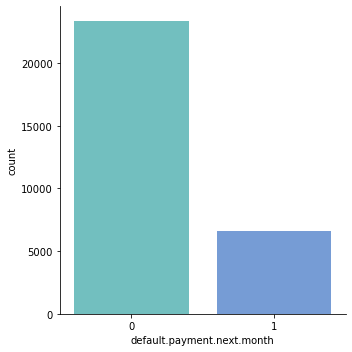

In [16]:
not_defaulter = df[df['default.payment.next.month']==0].shape[0]
defaulter = df[df['default.payment.next.month']== 1].shape[0]
print("not_defaulter: " + str(not_defaulter/len(df)*100) + ", defaulter: " + str(defaulter/len(df)*100))
sns.catplot(data=df, x="default.payment.next.month", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

## Model Training and Evaluation:

#### Defining X and y:

In [173]:
X = df.drop("default.payment.next.month", axis = 1)
y = df["default.payment.next.month"]

In [174]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [175]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train,y_train,X_test,y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
      

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
       
        print('='*35)
        print('\n')
        
    
        
    

### Handling the imbalanced data:

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class
 
 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [176]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

### Splitting the data:

In [177]:
xtrain, xtest, ytrain, ytest = train_test_split(X_res.values, y_res.values, train_size=0.80, random_state=32)


### Normalizing the data:

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

In [179]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoost Classifier": CatBoostClassifier(verbose = False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GaussianNB Classifier" : GaussianNB()
    
    
}

In [180]:
evaluate_models(x_train_scaled, ytrain,x_test_scaled, ytest, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9993
- Recall: 0.9996
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.8549
- F1 score: 0.8529
- Precision: 0.8710
- Recall: 0.8356
- Roc Auc Score: 0.8550


Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9997
- Recall: 0.9993
- Roc Auc Score: 0.9995
----------------------------------
Model performance for Test set
- Accuracy: 0.7619
- F1 score: 0.7665
- Precision: 0.7569
- Recall: 0.7764
- Roc Auc Score: 0.7618


Gradient Boosting
Model performance for Training set
- Accuracy: 0.7879
- F1 score: 0.7800
- Precision: 0.8084
- Recall: 0.7536
- Roc Auc Score: 0.7878
----------------------------------
Model performance for Test set
- Accuracy: 0.7893
- F1 score: 0.7825
- Precision: 0.8146
- Recall: 0.7528
- Roc Auc Score: 0.7895


Logistic Regression
Model performance for Training 

### Conclusion: 
**As we see in above results among all the models the catboost classifier has least overfitting and high values of performance metrics.So we choose catboost classifier model.**